In [98]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [99]:
from google.colab import drive
drive.mount('/content/drive')

path_movies = "/content/drive/Shareddrives/AIML-Project/ml-1m/movies.dat"
df_movies = pd.read_csv(path_movies, sep = '::', parse_dates=[1], dayfirst=True, header = None, encoding='latin-1', engine='python')
df_movies.columns =['Movie ID', 'Movie Title', 'Genre']
path_ratings = "/content/drive/Shareddrives/AIML-Project/ml-1m/ratings.dat"
df_ratings = pd.read_csv(path_ratings, sep = '::', parse_dates=[1], dayfirst=True, header = None, encoding='latin-1', engine='python')
df_ratings.columns =['Movie ID', 'User ID', 'Rating', "Timestamp"]
path_users = "/content/drive/Shareddrives/AIML-Project/ml-1m/users.dat"
df_users = pd.read_csv(path_users, sep = '::', parse_dates=[1], dayfirst=True, header = None, encoding='latin-1', engine='python')
df_users.columns =['User ID', 'Gender', 'Age', "Occupation", "Zip-code"]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie ID     3883 non-null   int64 
 1   Movie Title  3883 non-null   object
 2   Genre        3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [101]:
for col in df_movies.columns:
  print(col, df_movies[col].isna().sum())

Movie ID 0
Movie Title 0
Genre 0


In [102]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   Movie ID   1000209 non-null  int64
 1   User ID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [103]:
for col in df_ratings.columns:
  print(col, df_ratings[col].isna().sum())

Movie ID 0
User ID 0
Rating 0
Timestamp 0


In [104]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [105]:
for col in df_users.columns:
  print(col, df_users[col].isna().sum())

User ID 0
Gender 0
Age 0
Occupation 0
Zip-code 0


In [106]:
df_movies.head()

,Movie ID,Movie Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [107]:
df_ratings.head()

,Movie ID,User ID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [108]:
df_users.head()

,User ID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [109]:
df_movies['year'] = df_movies['Movie Title'].str.extract('(\(\d\d\d\d\))',expand=False)
df_movies['year'] = df_movies['year'].str.extract('(\d\d\d\d)',expand=False)
df_movies['Movie Title'] = df_movies['Movie Title'].str.replace('(\(\d\d\d\d\))', '')
df_movies['Movie Title'] = df_movies['Movie Title'].apply(lambda x: x.strip())
df_movies.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Movie ID,Movie Title,Genre,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [110]:
df_merged1 = df_ratings.merge(df_movies[['Movie ID', 'Movie Title', 'Genre', 'year']], on = 'Movie ID')
for col in df_merged1.columns:
  print(col, df_merged1[col].isna().sum())

Movie ID 0
User ID 0
Rating 0
Timestamp 0
Movie Title 0
Genre 0
year 0


In [111]:
df_merged1.shape

(645833, 7)

In [112]:
#Size of the Rating Dataset
df_ratings.shape[0]

1000209

In [113]:
#Movie IDs in Rating Dataset and also in Movie Dataset
df_ratings[df_ratings['Movie ID'].isin(df_movies['Movie ID'].tolist())].shape[0]

645833

In [114]:
#User IDs in Rating Dataset and also in User Dataset
df_ratings[df_ratings['User ID'].isin(df_users['User ID'].tolist())].shape[0]

1000209

In [115]:
df_merged = df_merged1.merge(df_users[['User ID',	'Gender',	'Age',	'Occupation',	'Zip-code']], on = 'User ID')

In [116]:
df_merged.head()

,Movie ID,User ID,Rating,Timestamp,Movie Title,Genre,year,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,Toy Story,Animation|Children's|Comedy,1995,M,25,12,90712
1,2,1193,5,978298413,Jumanji,Adventure|Children's|Fantasy,1995,M,25,12,90712
2,12,1193,4,978220179,Dracula: Dead and Loving It,Comedy|Horror,1995,M,25,12,90712
3,15,1193,4,978199279,Cutthroat Island,Action|Adventure|Romance,1995,M,25,12,90712
4,17,1193,5,978158471,Sense and Sensibility,Drama|Romance,1995,M,25,12,90712


In [117]:
df_merged.describe()

,Movie ID,User ID,Rating,Timestamp,Age,Occupation
count,645833.000000,645833.000000,645833.000000,6.458330e+05,645833.000000,645833.000000
mean,2007.571886,1876.685502,3.570423,9.759020e+08,30.467556,8.185712
std,1147.578921,1105.029482,1.121767,1.071665e+07,13.275913,6.272680
min,1.000000,1.000000,1.000000,9.656765e+08,1.000000,0.000000
25%,1040.000000,1031.000000,3.000000,9.718839e+08,25.000000,3.000000
50%,1962.000000,1873.000000,4.000000,9.747490e+08,25.000000,7.000000
75%,3032.000000,2791.000000,4.000000,9.760470e+08,35.000000,14.000000
max,3952.000000,3952.000000,5.000000,1.046393e+09,56.000000,20.000000


In [118]:
df_merged_sort_time = df_merged.sort_values(by='Timestamp', ascending=True)
#df_merged_sort_time = df_merged_sort_time_1M[0:10000]
df_merged_sort_time.shape

(645833, 11)

In [119]:
train_size = df_merged_sort_time.shape[0] * 0.9
train_size = round(train_size)
train_size

581250

In [120]:
df_merged_sort_time_train = df_merged_sort_time[0:train_size]
df_merged_sort_time_test = df_merged_sort_time[train_size:-1]
df_merged_sort_time_test.shape

(64582, 11)

### EDA
1. Distribution of movies vs User
2. histogram of Ratings
3. Histogram of Male and Female
4. Age vs Number of Movies watched
5. Age vs number of users
6. Gender vs Ratings Pair plot
7. Gender vs Number of Movies
8. Genre Histogram/bar

Text(0, 0.5, 'Number of Users')

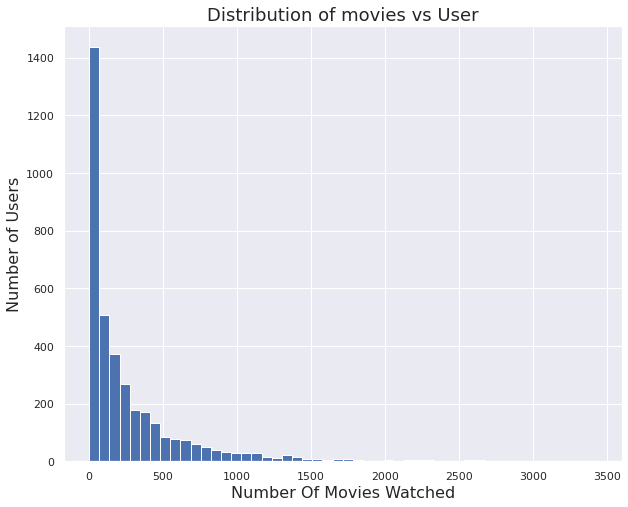

In [121]:
#Distribution of movies vs User [x-MovieCnt, y-NumberOfUser]
df_ratings.head()
uniqueCount = df_ratings.groupby("User ID").count()
uniqueCount['Rating'].nlargest(n=10)

uniqueCount["Rating"].hist(bins=50,figsize=(10,8))
plt.title('Distribution of movies vs User', size=18)
plt.xlabel('Number Of Movies Watched', size=16)
plt.ylabel('Number of Users', size=16)

# Learning: 
# 1. TopUser{MovieCount) :3048
# 2. BootmUser(MovieCount) : 1
#:3. On an average most of user watched 0 to 500 movies. 

Text(0, 0.5, 'Number of Ratings')

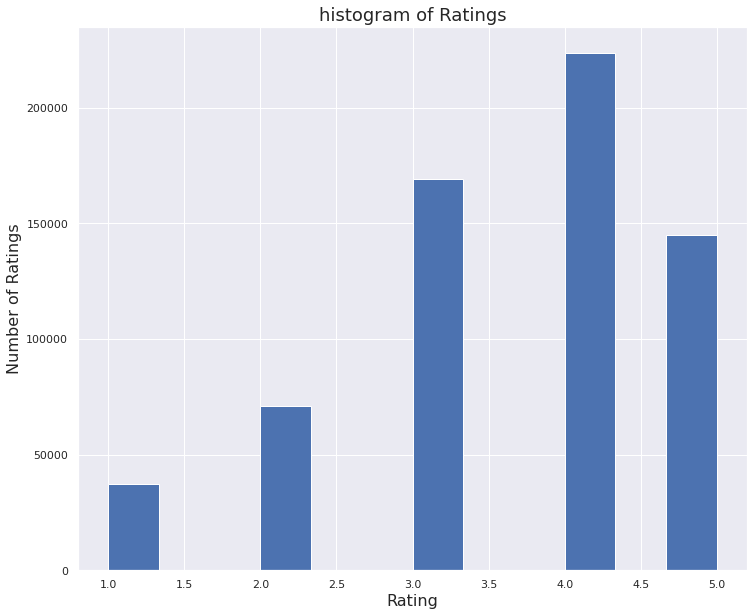

In [122]:
# histogram of Ratings
df_merged_sort_time["Rating"].hist(bins=12,figsize=(12,10))
plt.title('histogram of Ratings', size=18)
plt.xlabel('Rating', size=16)
plt.ylabel('Number of Ratings', size=16)

Text(0, 0.5, 'Gender Count')

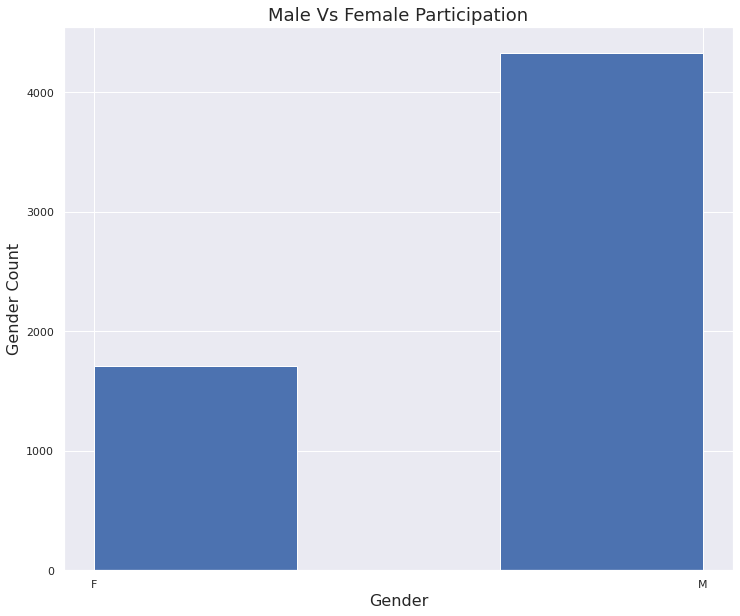

In [123]:
#Histogram of Male and Female
df_users["Gender"].hist(bins=3,figsize=(12,10))
plt.title('Male Vs Female Participation', size=18)
plt.xlabel('Gender', size=16)
plt.ylabel('Gender Count', size=16)

Text(0, 0.5, 'Number of Movies watched')

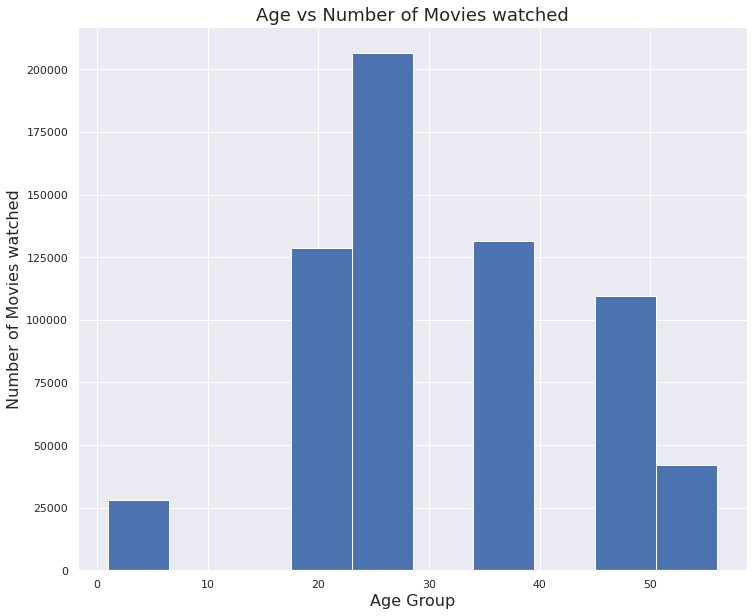

In [124]:
#Age vs Number of Movies watched
df_merged_sort_time.head()
df_merged_sort_time["Age"].hist(bins=10,figsize=(12,10))
plt.title('Age vs Number of Movies watched', size=18)
plt.xlabel('Age Group', size=16)
plt.ylabel('Number of Movies watched', size=16)

Text(0, 0.5, 'Number of User')

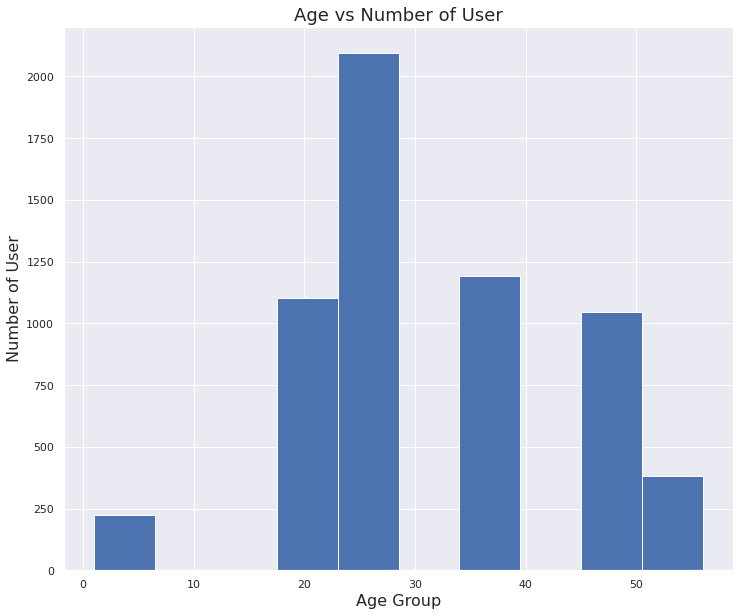

In [125]:
#Age vs number of users
df_users.head()
df_users["Age"].hist(bins=10,figsize=(12,10))
plt.title('Age vs Number of User', size=18)
plt.xlabel('Age Group', size=16)
plt.ylabel('Number of User', size=16)

In [126]:
#Pair plot Gender vs Ratings
df1 = df_merged_sort_time.filter(["Gender", "Rating"])
df1.head(20)
df2 = df1.groupby(['Gender', 'Rating'], as_index=True)["Rating"].count()
df2.head(20)
df3 = df2.to_frame()
df3.head(20)

Rating
Gender Rating        
F      1         9189
       2        18527
       3        46901
       4        65637
       5        45116
M      1        27928
       2        52447
       3       122127
       4       158185
       5        99776

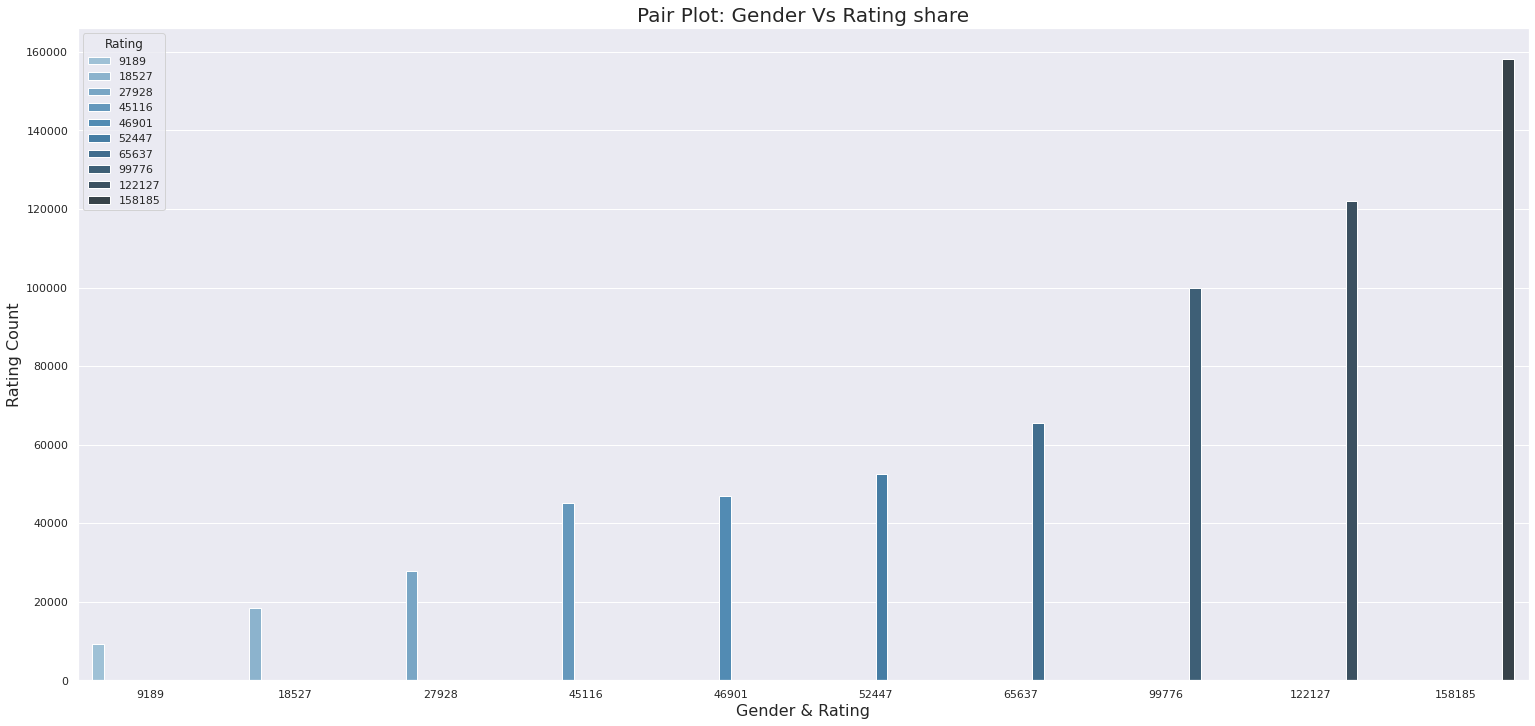

In [127]:
#Pair plot Gender vs Ratings
df1 = df_merged_sort_time.filter(["Gender", "Rating"])
df1.head(20)
df2 = df1.groupby(['Gender', 'Rating'], as_index=True)["Rating"].count()
df2.head(20)
df3 = df2.to_frame()
df3.head(20)

# df4 = pd.DataFrame({'Gender':df2.index, 'count':df2.Rating})
# df4.head()

import seaborn as sns
sns.set(rc={'figure.figsize':(26,12)})
plot1 = sns.barplot(x = 'Rating', y = 'Rating', hue = 'Rating', color = 'r', palette="Blues_d", data = df3, dodge=True)
plot1.axes.set_title("Pair Plot: Gender Vs Rating share", size = 20)
plot1.set_xlabel("Gender & Rating", size = 16)
plot1.set_ylabel("Rating Count", size = 16)
fig = plot1.get_figure()
fig.savefig("Q3_2.png")

Text(0, 0.5, 'Number of Movie')

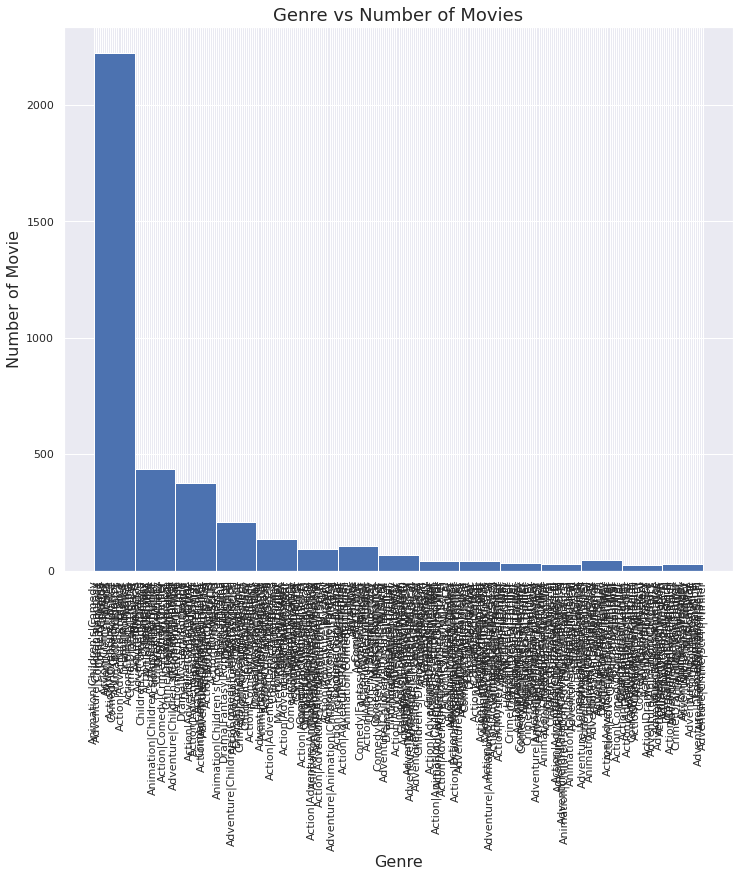

In [128]:
#Histogram of Genre vs Number of Movies
df_movies["Genre"].hist(bins=15, xrot = 90, figsize=(12,10))
plt.title('Genre vs Number of Movies', size=18)
plt.xlabel('Genre', size=16)
plt.ylabel('Number of Movie', size=16)

In [129]:
#Histogram of Genre vs Number of Movies
df_movies["Genre"].head(20)
GenresDf = df_movies.filter(["Movie ID", "Genre"])
GenresDf = GenresDf.Genre.str.split('|', expand=True)
count = 0
for idx in GenresDf:
    # for idx2 in GenresDf[idx]:
    #     if(GenresDf[idx][idx2] != None):
    #         count += 1
    print(GenresDf[idx][1])

print(count) 
print(GenresDf.head())
# df_movies["Genre"].hist(bins=15, xrot = 90, figsize=(12,10))
# plt.title('Genre vs Number of Movies', size=18)
# plt.xlabel('Genre', size=16)
# plt.ylabel('Number of Movie', size=16)

Adventure
Children's
Fantasy
None
None
None
0
           0           1        2     3     4     5
0  Animation  Children's   Comedy  None  None  None
1  Adventure  Children's  Fantasy  None  None  None
2     Comedy     Romance     None  None  None  None
3     Comedy       Drama     None  None  None  None
4     Comedy        None     None  None  None  None


In [130]:
#Calculate Similarity Score between Users in Group
def calcPearsonCor(groupUser, df_user):
  #Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
  pearsonCor = {}

  #For every user group in our subset
  for name, group in groupUser:
      #Let's start by sorting the input and current user group so the values aren't mixed up later on
      group = group.sort_values(by='Movie ID')
      selectMovie = df_user.sort_values(by='Movie ID')
      #Get the N for the formula
      n = len(group)
      #Get the review scores for the movies that they both have in common
      temp = selectMovie[selectMovie['Movie ID'].isin(group['Movie ID'].tolist())]
      #And then store them in a temporary buffer variable in a list format to facilitate future calculations
      tempRatingList = temp['Rating'].tolist()
      #put the current user group reviews in a list format
      tempGroupList = group['Rating'].tolist()
      #Now let's calculate the pearson correlation between two users, so called, x and y
      Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(n)
      Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(n)
      Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(n)
      
      #If the denominator is different than zero, then divide, else, 0 correlation.
      if Sxx != 0 and Syy != 0:
          pearsonCor[name] = Sxy/sqrt(Sxx*Syy)
      else:
          pearsonCor[name] = 0

  return pearsonCor

In [131]:
#Get TOP Users List ordered according to similarity score
def calcTopUsersList(userId, subUserSize):
  TopUsersRating = None
  topMatchUsers = None
  df_user_selected = None
  df_user_selected = df_merged_sort_time_train[df_merged_sort_time_train['User ID'] == userId]
  # print("Movies Watched by User", df_user_selected.shape[0])

  #Users who have watched Movies, watched by the Selected User
  users = df_merged_sort_time_train[df_merged_sort_time_train['Movie ID'].isin(df_user_selected['Movie ID'].tolist())]

  subGroupuser = users.groupby(['User ID'])
  subGroupuser = sorted(subGroupuser,  key=lambda input: len(input[1]), reverse=True)

  #selecting "subUserSize" number of, users who have watched highest movies same as target user
  subSetGroupuser = subGroupuser[0:subUserSize]

  pearsonCor = calcPearsonCor(subSetGroupuser, df_user_selected)

  pearsonCorDF = pd.DataFrame.from_dict(pearsonCor, orient='index')
  if(pearsonCorDF.shape[0] != 0):
    pearsonCorDF.columns = ['similarityIndex']
    pearsonCorDF['userId'] = pearsonCorDF.index
    pearsonCorDF.index = range(len(pearsonCorDF))

    topMatchUsers=pearsonCorDF.sort_values(by='similarityIndex', ascending=False).reset_index()
    topMatchUsersRating=topMatchUsers.merge(df_ratings, left_on='userId', right_on='User ID', how='inner')

    topMatchUsersRating['weightedRating'] = topMatchUsersRating['similarityIndex']*topMatchUsersRating['Rating']

    TopUsersRating = topMatchUsersRating.groupby('Movie ID').sum()[['similarityIndex','weightedRating']]
    TopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
    TopUsersRating['Recommendation_score'] = TopUsersRating['sum_weightedRating']/TopUsersRating['sum_similarityIndex']
    TopUsersRating = TopUsersRating.sort_values(by='Recommendation_score', ascending=False)
  
  return df_user_selected, topMatchUsers, TopUsersRating

In [132]:
# Paper 1 Implementation - Time based Approach
def paper1_Implement(userId, number_of_movies_to_recommend, df_user_selected, topMatchUsers):
  #paper 1 Implementation
  userLastMovie = df_user_selected.sort_values(by='Timestamp', ascending=False)[0:]['Movie ID'].values[0]
  # print("Recent Movie of Selected User",  userLastMovie)

  listmovies = []

  sumsimilarity = topMatchUsers["similarityIndex"].sum()
  #print("sum of similarity", sumsimilarity)
  #Order selected users movies
  total_recommendation_count = 0

  for  i in range(0, len(topMatchUsers)):
    user = topMatchUsers[i:]['userId'].values[0]

    if(user == userId):
      continue

    similarity = topMatchUsers[i:]['similarityIndex'].values[0]
    recommendation_per_user = (similarity/sumsimilarity)*number_of_movies_to_recommend
    #print("user Recommendation", user, recommendation_per_user)
    #Get Data Frame of only neighbor user
    df_recommend_user = df_merged_sort_time_train[df_merged_sort_time_train['User ID'] == user].sort_values(by='Timestamp', ascending=False).reset_index()

    #print(df_recommend_user)

    #Get last time Stamp
    df_recommend_user_timestamp = df_recommend_user[df_recommend_user['Movie ID'] == userLastMovie].reset_index()
    #print(df_recommend_user_timestamp)
    if df_recommend_user_timestamp.empty:
      #print("Not in list")
      continue
    userLasttimestamp = (df_recommend_user_timestamp[0:])['Timestamp'].values[0]
    #print(userLasttimestamp)

    df_recommend_user = df_recommend_user[df_recommend_user['Timestamp'] > userLasttimestamp].sort_values(by='Timestamp', ascending=True).reset_index()

    if df_recommend_user.empty:
      #print("Not in list after time")
      continue

    #print(df_recommend_user.head())

    individual_recommendation_count = 0
    individual_index = 0

    #Loop and Search Movies in Neighbor list 
    while(total_recommendation_count < number_of_movies_to_recommend and individual_recommendation_count < recommendation_per_user):
      movie = (df_recommend_user[individual_index:])['Movie ID'].values[0]
      #print(movie)
      if(movie not in listmovies):
        #print((df_recommend_user[individual_index:])['Movie ID'].values[0])
        
        if(movie in df_user_selected['Movie ID'].tolist()):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue
          
        listmovies.append((df_recommend_user[individual_index:])['Movie ID'].values[0])
        total_recommendation_count = total_recommendation_count + 1
        individual_recommendation_count = individual_recommendation_count + 1

      #print(listmovies)
      individual_index= individual_index + 1
      if(individual_index >= len(df_recommend_user)):
        break

  return listmovies


In [133]:
#Paper 2 - Single-Preference Approac
def paper2_option1_Implement(userId, number_of_movies_to_recommend, df_user_selected, topMatchUsers, rating_threshold):
  #paper 2 Implementation  - 1st Option

  #Find Favourite Genre of selected user
  genreDict = {}
  for i in df_user_selected['Genre']:
    list = str(i).split('|')
    for j in list:
      if j in genreDict:
        genreDict[j] = genreDict[j] + 1
      else:
        genreDict[j] = 1

  max = 0
  max_key = None
  for key, value in genreDict.items():
    if(value > max):
      max = value
      max_key = key

  genrefavourite = max_key

  userLastMovie = df_user_selected.sort_values(by='Timestamp', ascending=False)[0:]['Movie ID'].values[0]
  # print("Recent Movie of Selected User",  userLastMovie)

  listmovies = []

  sumsimilarity = topMatchUsers["similarityIndex"].sum()
  #print("sum of similarity", sumsimilarity)
  #Order selected users movies
  total_recommendation_count = 0


  for  i in range(0, len(topMatchUsers)):
    user = topMatchUsers[i:]['userId'].values[0]

    if(user == userId):
      continue

    similarity = topMatchUsers[i:]['similarityIndex'].values[0]
    recommendation_per_user = (similarity/sumsimilarity)*number_of_movies_to_recommend

    #Get Data Frame of only neighbor user
    df_recommend_user = df_merged_sort_time_train[df_merged_sort_time_train['User ID'] == user].sort_values(by='Timestamp', ascending=False).reset_index()

    #print(df_recommend_user)

    #Get last time Stamp
    df_recommend_user_timestamp = df_recommend_user[df_recommend_user['Movie ID'] == userLastMovie].reset_index()
    #print(df_recommend_user_timestamp)
    if df_recommend_user_timestamp.empty:
      continue
    userLasttimestamp = (df_recommend_user_timestamp[0:])['Timestamp'].values[0]
    #print(userLasttimestamp)

    df_recommend_user = df_recommend_user[df_recommend_user['Timestamp'] > userLasttimestamp].sort_values(by='Timestamp', ascending=True).reset_index()

    if df_recommend_user.empty:
      continue

    #print(df_recommend_user)

    individual_recommendation_count = 0
    individual_index = 0

    #Loop and Search Movies in Neighbor list 
    while(total_recommendation_count < number_of_movies_to_recommend and individual_recommendation_count < recommendation_per_user):
      movie = (df_recommend_user[individual_index:])['Movie ID'].values[0]
      if(movie not in listmovies):
        #print((df_recommend_user[individual_index:])['Movie ID'].values[0])
        
        if(movie in df_user_selected['Movie ID'].tolist()):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue

        genrelist = str((df_recommend_user[individual_index:])['Genre'].values[0]).split('|')
        #print(genrelist)
        if(genrefavourite not in genrelist):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue

        if((df_recommend_user[individual_index:])['Rating'].values[0] < rating_threshold):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue

        listmovies.append((df_recommend_user[individual_index:])['Movie ID'].values[0])
        total_recommendation_count = total_recommendation_count + 1
        individual_recommendation_count = individual_recommendation_count + 1

      individual_index= individual_index + 1
      if(individual_index >= len(df_recommend_user)):
        break

  return listmovies

In [134]:
#Paper 2 - Multi-Preference Approach
def paper2_option2_Implement(userId, number_of_movies_to_recommend, df_user_selected, topMatchUsers, rating_threshold):
  #paper 2 Implementation  - 2nd Option

  #Find Favourite Genre of selected user
  genreDict = {}
  for i in df_user_selected['Genre']:
    list = str(i).split('|')
    for j in list:
      if j in genreDict:
        genreDict[j] = genreDict[j] + 1
      else:
        genreDict[j] = 1

  max = 0
  max_key = None
  for key, value in genreDict.items():
    if(value > max):
      max = value
      max_key = key

  genrefavourite = max_key

  #print(df_user_selected.sort_values(by='Timestamp', ascending=False))

  userLastMovieList = []
  min = 3
  if(len(df_user_selected.sort_values(by='Timestamp', ascending=False)) < min):
    min = len(df_user_selected.sort_values(by='Timestamp', ascending=False))
  for i in range(0, min):
    userLastMovieList.append(df_user_selected.sort_values(by='Timestamp', ascending=False)[i:]['Movie ID'].values[0])
  # print("Recent Movie of Selected User",  userLastMovieList)

  listmovies = []

  sumsimilarity = topMatchUsers["similarityIndex"].sum()
  #print("sum of similarity", sumsimilarity)
  #Order selected users movies
  total_recommendation_count = 0


  for  i in range(0, len(topMatchUsers)):
    user = topMatchUsers[i:]['userId'].values[0]

    if(user == userId):
      continue

    similarity = topMatchUsers[i:]['similarityIndex'].values[0]
    recommendation_per_user = (similarity/sumsimilarity)*number_of_movies_to_recommend

    #Get Data Frame of only neighbor user
    df_recommend_user = df_merged_sort_time_train[df_merged_sort_time_train['User ID'] == user].sort_values(by='Timestamp', ascending=False).reset_index()

    #print(df_recommend_user)

    userLasttimestampList = []
    #Get time Stamp List

    for i in userLastMovieList:
      df_recommend_user_timestamp = df_recommend_user[df_recommend_user['Movie ID'] == i].reset_index()
      #print(df_recommend_user_timestamp)
      if df_recommend_user_timestamp.empty:
        continue
      userLasttimestampList.append((df_recommend_user_timestamp[0:])['Timestamp'].values[0])
    
    if(len(userLasttimestampList) == 0):
      continue
    
    userLasttimestamp = userLasttimestampList[0]

    for i in range(1, len(userLasttimestampList)):
      if(userLasttimestampList[i] < userLasttimestamp):
        userLasttimestamp = userLasttimestampList[i]

    #print(userLasttimestamp)

    df_recommend_user = df_recommend_user[df_recommend_user['Timestamp'] > userLasttimestamp - 100000]
    #df_recommend_user = df_recommend_user[df_recommend_user['Timestamp'] < userLasttimestamp + 100000]
    df_recommend_user = df_recommend_user.sort_values(by='Timestamp', ascending=True).reset_index()

    if df_recommend_user.empty:
      continue

    #print(df_recommend_user)

    individual_recommendation_count = 0
    individual_index = 0

    #Loop and Search Movies in Neighbor list 
    while(total_recommendation_count < number_of_movies_to_recommend and individual_recommendation_count < recommendation_per_user):
      movie = (df_recommend_user[individual_index:])['Movie ID'].values[0]
      if(movie not in listmovies):
        #print((df_recommend_user[individual_index:])['Movie ID'].values[0])
        
        if(movie in df_user_selected['Movie ID'].tolist()):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue

        genrelist = str((df_recommend_user[individual_index:])['Genre'].values[0]).split('|')
        #print(genrelist)
        if(genrefavourite not in genrelist):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue

        if((df_recommend_user[individual_index:])['Rating'].values[0] < rating_threshold):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue
         
        listmovies.append((df_recommend_user[individual_index:])['Movie ID'].values[0])
        total_recommendation_count = total_recommendation_count + 1
        individual_recommendation_count = individual_recommendation_count + 1

      individual_index= individual_index + 1
      if(individual_index >= len(df_recommend_user)):
        break

  return listmovies


In [135]:
#Paper 2 - Two-sided Proximity Approach
def paper2_option3_Implement(userId, number_of_movies_to_recommend, df_user_selected, topMatchUsers, rating_threshold):
  #paper 2 Implementation  - 3rd Option

  #Find Favourite Genre of selected user
  genreDict = {}
  for i in df_user_selected['Genre']:
    list = str(i).split('|')
    for j in list:
      if j in genreDict:
        genreDict[j] = genreDict[j] + 1
      else:
        genreDict[j] = 1

  max = 0
  max_key = None
  for key, value in genreDict.items():
    if(value > max):
      max = value
      max_key = key

  genrefavourite = max_key

  userLastMovie = df_user_selected.sort_values(by='Timestamp', ascending=False)[:1]['Movie ID'].values[0]
  # print("Recent Movie of Selected User",  userLastMovie)

  listmovies = []

  sumsimilarity = topMatchUsers["similarityIndex"].sum()
  #print("sum of similarity", sumsimilarity)
  #Order selected users movies
  total_recommendation_count = 0


  for  i in range(0, len(topMatchUsers)):
    user = topMatchUsers[i:]['userId'].values[0]

    if(user == userId):
      continue

    similarity = topMatchUsers[i:]['similarityIndex'].values[0]
    recommendation_per_user = (similarity/sumsimilarity)*number_of_movies_to_recommend

    #Get Data Frame of only neighbor user
    df_recommend_user = df_merged_sort_time_train[df_merged_sort_time_train['User ID'] == user].sort_values(by='Timestamp', ascending=False).reset_index()

    #print(df_recommend_user)

    #Get last time Stamp
    df_recommend_user_timestamp = df_recommend_user[df_recommend_user['Movie ID'] == userLastMovie].reset_index()
    #print(df_recommend_user_timestamp)
    if df_recommend_user_timestamp.empty:
      continue
    userLasttimestamp = (df_recommend_user_timestamp[0:])['Timestamp'].values[0]
    #print(userLasttimestamp)

    df_recommend_user = df_recommend_user[df_recommend_user['Timestamp'] > userLasttimestamp - 10000000]
    #df_recommend_user = df_recommend_user[df_recommend_user['Timestamp'] < userLasttimestamp + 10000000]
    df_recommend_user = df_recommend_user.sort_values(by='Timestamp', ascending=True).reset_index()

    if df_recommend_user.empty:
      continue

    #print(df_recommend_user)

    individual_recommendation_count = 0
    individual_index = 0

    #Loop and Search Movies in Neighbor list 
    while(total_recommendation_count < number_of_movies_to_recommend and individual_recommendation_count < recommendation_per_user):
      movie = (df_recommend_user[individual_index:])['Movie ID'].values[0]
      if(movie not in listmovies):
        #print((df_recommend_user[individual_index:])['Movie ID'].values[0])
        
        if(movie in df_user_selected['Movie ID'].tolist()):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue

        genrelist = str((df_recommend_user[individual_index:])['Genre'].values[0]).split('|')
        #print(genrelist)
        if(genrefavourite not in genrelist):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue

        if((df_recommend_user[individual_index:])['Rating'].values[0] < rating_threshold):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue
                
        listmovies.append((df_recommend_user[individual_index:])['Movie ID'].values[0])
        total_recommendation_count = total_recommendation_count + 1
        individual_recommendation_count = individual_recommendation_count + 1

      individual_index= individual_index + 1
      if(individual_index >= len(df_recommend_user)):
        break

  return listmovies

In [136]:
#Proposed Profile Preference + Paper 2 Multi-Preference Approach
def proposed_Implement_paper2_option2_Implement(userId, number_of_movies_to_recommend, df_user_selected, topMatchUsers, rating_threshold):
  #Proposed + paper 2 Implementation  - 2nd Option

  #Find Favourite Genre of selected user
  genreDict = {}
  for i in df_user_selected['Genre']:
    list = str(i).split('|')
    for j in list:
      if j in genreDict:
        genreDict[j] = genreDict[j] + 1
      else:
        genreDict[j] = 1

  max = 0
  max_key = None
  for key, value in genreDict.items():
    if(value > max):
      max = value
      max_key = key

  genrefavourite = max_key

  #print(df_user_selected.sort_values(by='Timestamp', ascending=False))

  userLastMovieList = []
  min = 3
  if(len(df_user_selected.sort_values(by='Timestamp', ascending=False)) < min):
    min = len(df_user_selected.sort_values(by='Timestamp', ascending=False))
  for i in range(0, min):
    userLastMovieList.append(df_user_selected.sort_values(by='Timestamp', ascending=False)[i:]['Movie ID'].values[0])
  # print("Recent Movie of Selected User",  userLastMovieList)

  #Order selected users movies
  topMatchUsers = topMatchUsers.merge(df_users, left_on='userId', right_on='User ID', how='inner')
  topMatchUsers['AgeGroup'] = topMatchUsers['Age']/10
  #topMatchUsers['modsimilarityIndex'] = topMatchUsers["similarityIndex"]

  listmovies = []

  match_score_list = []
  for i in range(0, len(topMatchUsers)):
    user = topMatchUsers[i:]['userId'].values[0]
    match_score = 0 
    target_user_age_group = df_users[df_users['User ID'] == userId]['Age'].values[0]/10
    target_user_age_gender  = df_users[df_users['User ID'] == userId]['Gender'].values[0]
    target_user_age_occupation  = df_users[df_users['User ID'] == userId]['Occupation'].values[0]
    if(target_user_age_group == topMatchUsers[i:]['AgeGroup'].values[0]):
      match_score = match_score + 1
    if(target_user_age_gender == topMatchUsers[i:]['Gender'].values[0]):
      match_score = match_score + 1
    if(target_user_age_occupation == topMatchUsers[i:]['Occupation'].values[0]):
      match_score = match_score + 1
    match_score_list.append(match_score)
  topMatchUsers['match_score'] = match_score_list

  sumsimilarity = topMatchUsers["similarityIndex"].sum()
  #print("sum of similarity", sumsimilarity)
  #Order selected users movies
  total_recommendation_count = 0


  for  i in range(0, len(topMatchUsers)):
    user = topMatchUsers[i:]['userId'].values[0]

    if(user == userId):
      continue

    similarity = topMatchUsers[i:]['similarityIndex'].values[0]
    match_score = topMatchUsers[i:]['match_score'].values[0]
    recommendation_count = (similarity/sumsimilarity)*number_of_movies_to_recommend
    recommendation_per_user = recommendation_count + match_score

    #Get Data Frame of only neighbor user
    df_recommend_user = df_merged_sort_time_train[df_merged_sort_time_train['User ID'] == user].sort_values(by='Timestamp', ascending=False).reset_index()

    #print(df_recommend_user)

    userLasttimestampList = []
    #Get time Stamp List

    for i in userLastMovieList:
      df_recommend_user_timestamp = df_recommend_user[df_recommend_user['Movie ID'] == i].reset_index()
      #print(df_recommend_user_timestamp)
      if df_recommend_user_timestamp.empty:
        continue
      userLasttimestampList.append((df_recommend_user_timestamp[0:])['Timestamp'].values[0])
    
    if(len(userLasttimestampList) == 0):
      continue
    
    userLasttimestamp = userLasttimestampList[0]

    for i in range(1, len(userLasttimestampList)):
      if(userLasttimestampList[i] < userLasttimestamp):
        userLasttimestamp = userLasttimestampList[i]

    #print(userLasttimestamp)

    df_recommend_user = df_recommend_user[df_recommend_user['Timestamp'] > userLasttimestamp - 100000]
    #df_recommend_user = df_recommend_user[df_recommend_user['Timestamp'] < userLasttimestamp + 100000]
    df_recommend_user = df_recommend_user.sort_values(by='Timestamp', ascending=True).reset_index()

    if df_recommend_user.empty:
      continue

    #print(df_recommend_user)

    individual_recommendation_count = 0
    individual_index = 0

    #Loop and Search Movies in Neighbor list 
    while(total_recommendation_count < number_of_movies_to_recommend and individual_recommendation_count < recommendation_per_user):
      movie = (df_recommend_user[individual_index:])['Movie ID'].values[0]
      if(movie not in listmovies):
        #print((df_recommend_user[individual_index:])['Movie ID'].values[0])
        
        if(movie in df_user_selected['Movie ID'].tolist()):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue

        genrelist = str((df_recommend_user[individual_index:])['Genre'].values[0]).split('|')
        #print(genrelist)
        if(genrefavourite not in genrelist):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue

        if((df_recommend_user[individual_index:])['Rating'].values[0] < rating_threshold):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue
         
        listmovies.append((df_recommend_user[individual_index:])['Movie ID'].values[0])
        total_recommendation_count = total_recommendation_count + 1
        individual_recommendation_count = individual_recommendation_count + 1

      individual_index= individual_index + 1
      if(individual_index >= len(df_recommend_user)):
        break

  return listmovies


In [137]:
#Proposed Profile Preference + Sliding Window Recommendation Count + Paper 2 Multi-Preference Approach

def proposed_Implement_paper2_option2_Sliding_Recommendation_Count_Implement(userId, number_of_movies_to_recommend, df_user_selected, topMatchUsers, rating_threshold):

  #Find Favourite Genre of selected user
  genreDict = {}
  for i in df_user_selected['Genre']:
    list = str(i).split('|')
    for j in list:
      if j in genreDict:
        genreDict[j] = genreDict[j] + 1
      else:
        genreDict[j] = 1

  max = 0
  max_key = None
  for key, value in genreDict.items():
    if(value > max):
      max = value
      max_key = key

  genrefavourite = max_key

  #print(df_user_selected.sort_values(by='Timestamp', ascending=False))

  
  #Order selected users movies
  topMatchUsers = topMatchUsers.merge(df_users, left_on='userId', right_on='User ID', how='inner')
  topMatchUsers['AgeGroup'] = topMatchUsers['Age']/10
  #topMatchUsers['modsimilarityIndex'] = topMatchUsers["similarityIndex"]

  userLastMovieList = []
  min = 3
  if(len(df_user_selected.sort_values(by='Timestamp', ascending=False)) < min):
    min = len(df_user_selected.sort_values(by='Timestamp', ascending=False))
  for i in range(0, min):
    userLastMovieList.append(df_user_selected.sort_values(by='Timestamp', ascending=False)[i:]['Movie ID'].values[0])
  # print("Recent Movie of Selected User",  userLastMovieList)

  listmovies = []
  prev_remaining = 0
  match_score_list = []
  for i in range(0, len(topMatchUsers)):
    user = topMatchUsers[i:]['userId'].values[0]
    match_score = 0 
    target_user_age_group = df_users[df_users['User ID'] == userId]['Age'].values[0]/10
    target_user_age_gender  = df_users[df_users['User ID'] == userId]['Gender'].values[0]
    target_user_age_occupation  = df_users[df_users['User ID'] == userId]['Occupation'].values[0]
    if(target_user_age_group == topMatchUsers[i:]['AgeGroup'].values[0]):
      match_score = match_score + 1
    if(target_user_age_gender == topMatchUsers[i:]['Gender'].values[0]):
      match_score = match_score + 1
    if(target_user_age_occupation == topMatchUsers[i:]['Occupation'].values[0]):
      match_score = match_score + 1
    match_score_list.append(match_score)
  topMatchUsers['match_score'] = match_score_list

  sumsimilarity = topMatchUsers["similarityIndex"].sum()
  #print("sum of similarity", sumsimilarity)
  #Order selected users movies
  total_recommendation_count = 0


  for  i in range(0, len(topMatchUsers)):
    user = topMatchUsers[i:]['userId'].values[0]

    if(user == userId):
      continue

    similarity = topMatchUsers[i:]['similarityIndex'].values[0]
    match_score = topMatchUsers[i:]['match_score'].values[0]
    recommendation_count = (similarity/sumsimilarity)*number_of_movies_to_recommend
    recommendation_per_user = recommendation_count + match_score + prev_remaining
    
    #Get Data Frame of only neighbor user
    df_recommend_user = df_merged_sort_time_train[df_merged_sort_time_train['User ID'] == user].sort_values(by='Timestamp', ascending=False).reset_index()

    #print(df_recommend_user)

    userLasttimestampList = []
    #Get time Stamp List

    for i in userLastMovieList:
      df_recommend_user_timestamp = df_recommend_user[df_recommend_user['Movie ID'] == i].reset_index()
      #print(df_recommend_user_timestamp)
      if df_recommend_user_timestamp.empty:
        continue
      userLasttimestampList.append((df_recommend_user_timestamp[0:])['Timestamp'].values[0])
    
    if(len(userLasttimestampList) == 0):
      continue
    
    userLasttimestamp = userLasttimestampList[0]

    for i in range(1, len(userLasttimestampList)):
      if(userLasttimestampList[i] < userLasttimestamp):
        userLasttimestamp = userLasttimestampList[i]

    #print(userLasttimestamp)

    df_recommend_user = df_recommend_user[df_recommend_user['Timestamp'] > userLasttimestamp - 100000]
    #df_recommend_user = df_recommend_user[df_recommend_user['Timestamp'] < userLasttimestamp + 100000]
    df_recommend_user = df_recommend_user.sort_values(by='Timestamp', ascending=True).reset_index()

    if df_recommend_user.empty:
      continue

    #print(df_recommend_user)

    individual_recommendation_count = 0
    individual_index = 0

    #Loop and Search Movies in Neighbor list 
    while(total_recommendation_count < number_of_movies_to_recommend and individual_recommendation_count < recommendation_per_user):
      movie = (df_recommend_user[individual_index:])['Movie ID'].values[0]
      if(movie not in listmovies):
        #print((df_recommend_user[individual_index:])['Movie ID'].values[0])
        
        if(movie in df_user_selected['Movie ID'].tolist()):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            if(individual_recommendation_count < recommendation_count):
              prev_remaining = recommendation_count - individual_recommendation_count
            break
          continue

        genrelist = str((df_recommend_user[individual_index:])['Genre'].values[0]).split('|')
        #print(genrelist)
        if(genrefavourite not in genrelist):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            if(individual_recommendation_count < recommendation_count):
              prev_remaining = recommendation_count - individual_recommendation_count
            break
          continue

        if((df_recommend_user[individual_index:])['Rating'].values[0] < rating_threshold):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            if(individual_recommendation_count < recommendation_count):
              prev_remaining = recommendation_count - individual_recommendation_count
            break
          continue
         
        listmovies.append((df_recommend_user[individual_index:])['Movie ID'].values[0])
        total_recommendation_count = total_recommendation_count + 1
        individual_recommendation_count = individual_recommendation_count + 1
      

      individual_index= individual_index + 1
      if(individual_index >= len(df_recommend_user)):
        if(individual_recommendation_count < recommendation_count):
          prev_remaining = recommendation_count - individual_recommendation_count
        break

  return listmovies


In [138]:
#Proposed Profile Preference Approach+ Paper 2 Two-sided Proximity Approach
def proposed_Implement_paper2_option3_Implement(userId, number_of_movies_to_recommend, df_user_selected, topMatchUsers, rating_threshold):

  #Find Favourite Genre of selected user
  genreDict = {}
  for i in df_user_selected['Genre']:
    list = str(i).split('|')
    for j in list:
      if j in genreDict:
        genreDict[j] = genreDict[j] + 1
      else:
        genreDict[j] = 1

  max = 0
  max_key = None
  for key, value in genreDict.items():
    if(value > max):
      max = value
      max_key = key

  genrefavourite = max_key

  userLastMovie = df_user_selected.sort_values(by='Timestamp', ascending=False)[:1]['Movie ID'].values[0]
  # print("Recent Movie of Selected User",  userLastMovie)

  listmovies = []
  prev_remaining  = 0
  sumsimilarity = topMatchUsers["similarityIndex"].sum()
  #print("sum of similarity", sumsimilarity)


  #Order selected users movies
  total_recommendation_count = 0
  topMatchUsers = topMatchUsers.merge(df_users, left_on='userId', right_on='User ID', how='inner')
  topMatchUsers['AgeGroup'] = topMatchUsers['Age']/10
  #topMatchUsers['modsimilarityIndex'] = topMatchUsers["similarityIndex"]

  #print(topMatchUsers.head())
  match_score_list = []
  for i in range(0, len(topMatchUsers)):
    user = topMatchUsers[i:]['userId'].values[0]
    match_score = 0 
    target_user_age_group = df_users[df_users['User ID'] == userId]['Age'].values[0]/10
    target_user_age_gender  = df_users[df_users['User ID'] == userId]['Gender'].values[0]
    target_user_age_occupation  = df_users[df_users['User ID'] == userId]['Occupation'].values[0]
    if(target_user_age_group == topMatchUsers[i:]['AgeGroup'].values[0]):
      match_score = match_score + 1
    if(target_user_age_gender == topMatchUsers[i:]['Gender'].values[0]):
      match_score = match_score + 1
    if(target_user_age_occupation == topMatchUsers[i:]['Occupation'].values[0]):
      match_score = match_score + 1
    match_score_list.append(match_score)
  topMatchUsers['match_score'] = match_score_list
  sumsimilarity = topMatchUsers["similarityIndex"].sum()
  for  i in range(0, len(topMatchUsers)):
    user = topMatchUsers[i:]['userId'].values[0]

    if(user == userId):
      continue

    similarity = topMatchUsers[i:]['similarityIndex'].values[0]
    match_score = topMatchUsers[i:]['match_score'].values[0]
    recommendation_count = (similarity/sumsimilarity)*number_of_movies_to_recommend
    recommendation_per_user = recommendation_count + match_score + prev_remaining
    #print(userId, similarity, summodsimilarity, recommendation_per_user)
    #Get Data Frame of only neighbor user
    df_recommend_user = df_merged_sort_time_train[df_merged_sort_time_train['User ID'] == user].sort_values(by='Timestamp', ascending=False).reset_index()

    #print(df_recommend_user)

    #Get last time Stamp
    df_recommend_user_timestamp = df_recommend_user[df_recommend_user['Movie ID'] == userLastMovie].reset_index()
    #print(df_recommend_user_timestamp)
    if df_recommend_user_timestamp.empty:
      continue
    userLasttimestamp = (df_recommend_user_timestamp[0:])['Timestamp'].values[0]
    #print(userLasttimestamp)

    df_recommend_user = df_recommend_user[df_recommend_user['Timestamp'] > userLasttimestamp - 10000000]
    #df_recommend_user = df_recommend_user[df_recommend_user['Timestamp'] < userLasttimestamp + 10000000]
    df_recommend_user = df_recommend_user.sort_values(by='Timestamp', ascending=True).reset_index()

    if df_recommend_user.empty:
      continue

    #print(df_recommend_user)

    individual_recommendation_count = 0
    individual_index = 0

    #Loop and Search Movies in Neighbor list 
    while(total_recommendation_count < number_of_movies_to_recommend and individual_recommendation_count < recommendation_per_user):
      movie = (df_recommend_user[individual_index:])['Movie ID'].values[0]
      if(movie not in listmovies):
        #print((df_recommend_user[individual_index:])['Movie ID'].values[0])
        
        if(movie in df_user_selected['Movie ID'].tolist()):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue

        genrelist = str((df_recommend_user[individual_index:])['Genre'].values[0]).split('|')
        #print(genrelist)
        if(genrefavourite not in genrelist):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue

        if((df_recommend_user[individual_index:])['Rating'].values[0] < rating_threshold):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            break
          continue
         
        listmovies.append((df_recommend_user[individual_index:])['Movie ID'].values[0])
        total_recommendation_count = total_recommendation_count + 1
        individual_recommendation_count = individual_recommendation_count + 1

      individual_index= individual_index + 1
      if(individual_index >= len(df_recommend_user)):
        break

  return listmovies

In [139]:
#Proposed Profile Preference Approach+ Sliding Window Recommendation Count + Paper 2 Two-sided Proximity Approach
def proposed_Implement_paper2_option3_Sliding_Recommendation_Count_Implement(userId, number_of_movies_to_recommend, df_user_selected, topMatchUsers, rating_threshold):

  #Find Favourite Genre of selected user
  genreDict = {}
  for i in df_user_selected['Genre']:
    list = str(i).split('|')
    for j in list:
      if j in genreDict:
        genreDict[j] = genreDict[j] + 1
      else:
        genreDict[j] = 1

  max = 0
  max_key = None
  for key, value in genreDict.items():
    if(value > max):
      max = value
      max_key = key

  genrefavourite = max_key

  userLastMovie = df_user_selected.sort_values(by='Timestamp', ascending=False)[:1]['Movie ID'].values[0]
  # print("Recent Movie of Selected User",  userLastMovie)

  listmovies = []

  sumsimilarity = topMatchUsers["similarityIndex"].sum()
  #print("sum of similarity", sumsimilarity)


  #Order selected users movies
  total_recommendation_count = 0
  topMatchUsers = topMatchUsers.merge(df_users, left_on='userId', right_on='User ID', how='inner')
  topMatchUsers['AgeGroup'] = topMatchUsers['Age']/10
  #topMatchUsers['modsimilarityIndex'] = topMatchUsers["similarityIndex"]

  #print(topMatchUsers.head())
  match_score_list = []
  for i in range(0, len(topMatchUsers)):
    user = topMatchUsers[i:]['userId'].values[0]
    match_score = 0 
    target_user_age_group = df_users[df_users['User ID'] == userId]['Age'].values[0]/10
    target_user_age_gender  = df_users[df_users['User ID'] == userId]['Gender'].values[0]
    target_user_age_occupation  = df_users[df_users['User ID'] == userId]['Occupation'].values[0]
    if(target_user_age_group == topMatchUsers[i:]['AgeGroup'].values[0]):
      match_score = match_score + 1
    if(target_user_age_gender == topMatchUsers[i:]['Gender'].values[0]):
      match_score = match_score + 1
    if(target_user_age_occupation == topMatchUsers[i:]['Occupation'].values[0]):
      match_score = match_score + 1
    match_score_list.append(match_score)
  topMatchUsers['match_score'] = match_score_list
  sumsimilarity = topMatchUsers["similarityIndex"].sum()
  for  i in range(0, len(topMatchUsers)):
    user = topMatchUsers[i:]['userId'].values[0]

    if(user == userId):
      continue

    similarity = topMatchUsers[i:]['similarityIndex'].values[0]
    match_score = topMatchUsers[i:]['match_score'].values[0]
    recommendation_count = (similarity/sumsimilarity)*number_of_movies_to_recommend
    recommendation_per_user = recommendation_count + match_score
    #print(userId, similarity, summodsimilarity, recommendation_per_user)
    #Get Data Frame of only neighbor user
    df_recommend_user = df_merged_sort_time_train[df_merged_sort_time_train['User ID'] == user].sort_values(by='Timestamp', ascending=False).reset_index()

    #print(df_recommend_user)

    #Get last time Stamp
    df_recommend_user_timestamp = df_recommend_user[df_recommend_user['Movie ID'] == userLastMovie].reset_index()
    #print(df_recommend_user_timestamp)
    if df_recommend_user_timestamp.empty:
      continue
    userLasttimestamp = (df_recommend_user_timestamp[0:])['Timestamp'].values[0]
    #print(userLasttimestamp)

    df_recommend_user = df_recommend_user[df_recommend_user['Timestamp'] > userLasttimestamp - 10000000]
    #df_recommend_user = df_recommend_user[df_recommend_user['Timestamp'] < userLasttimestamp + 10000000]
    df_recommend_user = df_recommend_user.sort_values(by='Timestamp', ascending=True).reset_index()

    if df_recommend_user.empty:
      continue

    #print(df_recommend_user)

    individual_recommendation_count = 0
    individual_index = 0

    #Loop and Search Movies in Neighbor list 
    while(total_recommendation_count < number_of_movies_to_recommend and individual_recommendation_count < recommendation_per_user):
      movie = (df_recommend_user[individual_index:])['Movie ID'].values[0]
      if(movie not in listmovies):
        #print((df_recommend_user[individual_index:])['Movie ID'].values[0])
        
        if(movie in df_user_selected['Movie ID'].tolist()):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            if(individual_recommendation_count < recommendation_count):
              prev_remaining = recommendation_count - individual_recommendation_count
            break
          continue

        genrelist = str((df_recommend_user[individual_index:])['Genre'].values[0]).split('|')
        #print(genrelist)
        if(genrefavourite not in genrelist):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            if(individual_recommendation_count < recommendation_count):
              prev_remaining = recommendation_count - individual_recommendation_count
            break
          continue

        if((df_recommend_user[individual_index:])['Rating'].values[0] < rating_threshold):
          individual_index= individual_index + 1
          if(individual_index >= len(df_recommend_user)):
            if(individual_recommendation_count < recommendation_count):
              prev_remaining = recommendation_count - individual_recommendation_count
            break
          continue
         
        listmovies.append((df_recommend_user[individual_index:])['Movie ID'].values[0])
        total_recommendation_count = total_recommendation_count + 1
        individual_recommendation_count = individual_recommendation_count + 1

      individual_index= individual_index + 1
      if(individual_index >= len(df_recommend_user)):
        if(individual_recommendation_count < recommendation_count):
          prev_remaining = recommendation_count - individual_recommendation_count
        break

  return listmovies

In [140]:
#If Number of Recommendations are less from methods, fill the recommendation list from user based collaborative filtering

def complete_recommendation_list(recommendation_movie_list, numberOfMovies, TopUsersRatings):
  for i in range(len(TopUsersRatings)):
    if(len(recommendation_movie_list) >= numberOfMovies):
      break
    movieId = (TopUsersRatings[i:])['Movie ID'].values[0]
    if(movieId in recommendation_movie_list):
      continue
    recommendation_movie_list.append(movieId)
  return recommendation_movie_list

# Using Paper-1 Implementation

def paper1_Recommendations(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, TopUsersRatings):

  #print("######### paper1_Implement #######")
  recommendation_movie_list = paper1_Implement(selectedUser, numberOfMovies, df_user_selected, topMatchUsers)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  complete_recommendation_list(recommendation_movie_list, numberOfMovies, TopUsersRatings)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  #print("##################################\n")
  return  recommendation_movie_list


# Using Paper-2 Implementation - 1st Option

def paper2_1_Recommendations(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, TopUsersRatings, threshold):
  #print("######### paper2_option1_Implement #######")
  recommendation_movie_list = paper2_option1_Implement(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, threshold)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  complete_recommendation_list(recommendation_movie_list, numberOfMovies, TopUsersRatings)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  #print("##################################\n")
  return  recommendation_movie_list

# Using Paper-2 Implementation - 2nd Option

def paper2_2_Recommendations(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, TopUsersRatings, threshold):
  #print("######### paper2_option2_Implement #######")
  recommendation_movie_list = paper2_option2_Implement(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, threshold)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  complete_recommendation_list(recommendation_movie_list, numberOfMovies, TopUsersRatings)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  #print("##################################\n")
  return  recommendation_movie_list


# Using Paper-2 Implementation - 3rd Option
def paper2_3_Recommendations(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, TopUsersRatings, threshold):
  #print("######### paper2_option3_Implement #######")
  recommendation_movie_list = paper2_option3_Implement(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, threshold)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  complete_recommendation_list(recommendation_movie_list, numberOfMovies, TopUsersRatings)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  #print("##################################\n")
  return  recommendation_movie_list


# Using Proposed + Paper-2 Implementation - 3rd Option
def proposed_paper2_2_Recommendations(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, TopUsersRatings, threshold):
  #print("######### Proposed + Paper-2 Implementation - 3rd Option #######")
  recommendation_movie_list = proposed_Implement_paper2_option2_Implement(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, threshold)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  complete_recommendation_list(recommendation_movie_list, numberOfMovies, TopUsersRatings)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  #print("##################################\n")
  return  recommendation_movie_list

def proposed_paper2_2_Sliding_Recommendations(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, TopUsersRatings, threshold):
  #print("######### Proposed + Paper-2 Implementation - 3rd Option #######")
  recommendation_movie_list = proposed_Implement_paper2_option2_Sliding_Recommendation_Count_Implement(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, threshold)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  complete_recommendation_list(recommendation_movie_list, numberOfMovies, TopUsersRatings)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  #print("##################################\n")
  return  recommendation_movie_list

# Using Proposed + Paper-2 Implementation - 3rd Option
def proposed_paper2_3_Recommendations(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, TopUsersRatings, threshold):
  #print("######### Proposed + Paper-2 Implementation - 3rd Option #######")
  recommendation_movie_list = proposed_Implement_paper2_option3_Implement(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, threshold)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  complete_recommendation_list(recommendation_movie_list, numberOfMovies, TopUsersRatings)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  #print("##################################\n")
  return  recommendation_movie_list

# Using Proposed + Paper-2 Implementation - 3rd Option + Sliding
def proposed_paper2_3_Sliding_Recommendations(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, TopUsersRatings, threshold):
  #print("######### Proposed + Paper-2 Implementation - 3rd Option #######")
  recommendation_movie_list = proposed_Implement_paper2_option3_Sliding_Recommendation_Count_Implement(selectedUser, numberOfMovies, df_user_selected, topMatchUsers, threshold)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  complete_recommendation_list(recommendation_movie_list, numberOfMovies, TopUsersRatings)
  recommendation_movie_list.sort()
  #print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
  #print("##################################\n")
  return  recommendation_movie_list

In [141]:
# #while(1):
#selectedUser =  input("Enter the User to get Recommendations ")
#numberofRecommendations = input("Enter the Number of Recommendations ")
#ratingThreshold = input("Enter Rating Threshold ")
#selectedUser = int(selectedUser)
#numberofRecommendations = int(numberofRecommendations)
#ratingThreshold = int(ratingThreshold)
#print("Giving",  numberofRecommendations, "Recommendations for User : ", selectedUser)
#df_user_selected, topMatchUsers, TopUsersRatings = calcTopUsersList(selectedUser, 100)
#TopUsersRatings = TopUsersRatings.reset_index(level=0)
#recommendation_movie_list = paper1_Recommendations(selectedUser, numberofRecommendations, df_user_selected, topMatchUsers, TopUsersRatings)
# paper2_1_Recommendations(selectedUser, numberofRecommendations, df_user_selected, topMatchUsers, TopUsersRatings, ratingThreshold)
# paper2_2_Recommendations(selectedUser, numberofRecommendations, df_user_selected, topMatchUsers, TopUsersRatings, ratingThreshold)
# paper2_3_Recommendations(selectedUser, numberofRecommendations, df_user_selected, topMatchUsers, TopUsersRatings, ratingThreshold)
# proposed_paper2_3_Recommendations(selectedUser, numberofRecommendations, df_user_selected, topMatchUsers, TopUsersRatings, ratingThreshold)
#recommendation_movie_list.sort()
#df_recommendation_display = pd.DataFrame(recommendation_movie_list, columns=['movie ID'])
#df_recommendation_display = df_recommendation_display.merge(df_movies, left_on='movie ID', right_on='Movie ID', how='inner').drop('movie ID', axis=1)

#print("##################################\n")
#df_recommendation_display

In [142]:
#selectedUser = 6
#numberOfMovies = 100
#df_user_selected, topMatchUsers, TopUsersRatings = calcTopUsersList(selectedUser, 100)
#recommendation_movie_list = proposed_Implement(selectedUser, numberOfMovies, df_user_selected, topMatchUsers)
#print("Number of Movies: ", len(recommendation_movie_list), "Recommended Movie IDs: ", recommendation_movie_list)
#recommendation_movie_list.sort()
#df_recommendation_display = pd.DataFrame(recommendation_movie_list, columns=['movie ID'])
#df_recommendation_display = df_recommendation_display.merge(df_movies, left_on='movie ID', right_on='Movie ID', how='inner').drop('movie ID', axis=1)

#print("##################################\n")
#df_recommendation_display

# EVALUATION

In [ ]:
# we can modify tune as per need
numberOfMovies_to_recommend = 100
#numSubUserSize = 100 # K value in checking Neighbours
ratingThreshold = 3

K = [100, 250, 500, 750, 1000]
#K = [100, 250]

df_test_user_movie_only = df_merged_sort_time_test[['User ID', 'Movie ID']]

test_user_unique = df_test_user_movie_only['User ID'].unique()
# df_test_user_movie_only_sorted = df_test_user_movie_only.sort_values(by=['User ID'])
# df_test_user_movie_only_sorted.head(10)

test_user_unique = df_test_user_movie_only['User ID'].unique()
#test_user_unique = test_user_unique[1:6]
numTestUsers = len(test_user_unique)
print(numTestUsers)

hit_rate_paper1 = []
hit_rate_paper2_1 = []
hit_rate_paper2_2 = []
hit_rate_paper2_3 = []
hit_rate_paper3_2 = []
hit_rate_paper3_3 = []
hit_rate_paper3_2_Sliding = []
hit_rate_paper3_3_Sliding = []

recall_paper1_list = []
recall_paper2_1_list = []
recall_paper2_2_list = []
recall_paper2_3_list = []
recall_paper3_2_list = []
recall_paper3_3_list = []
recall_paper3_2_Sliding_list = []
recall_paper3_3_Sliding_list = []

for numSubUserSize in K:

  start_time = time.time()

  recall_paper1 = 0.0
  recall_paper2_1 = 0.0
  recall_paper2_2 = 0.0
  recall_paper2_3 = 0.0
  recall_paper3_2 = 0.0
  recall_paper3_3 = 0.0
  recall_paper3_2_Sliding = 0.0
  recall_paper3_3_Sliding = 0.0

  total_tp_count_hr_paper1 = 0
  total_tp_count_hr_paper2_1 = 0
  total_tp_count_hr_paper2_2 = 0
  total_tp_count_hr_paper2_3 = 0
  total_tp_count_hr_paper3_2 = 0
  total_tp_count_hr_paper3_3 = 0
  total_tp_count_hr_paper3_2_Sliding = 0
  total_tp_count_hr_paper3_3_Sliding = 0

  counter = 0

  for uid in test_user_unique:
    if(counter >= 100):
      break;

    counter+=1

    tp_count_hr_paper1 = 0
    tp_count_hr_paper2_1 = 0
    tp_count_hr_paper2_2 = 0
    tp_count_hr_paper2_3 = 0
    tp_count_hr_paper3_2 = 0
    tp_count_hr_paper3_3 = 0
    tp_count_hr_paper3_2_Sliding = 0
    tp_count_hr_paper3_3_Sliding = 0

  #uid = 6
    df_testuser_selected = df_test_user_movie_only[df_test_user_movie_only['User ID'] == uid]

    df_user_selected, topMatchUsers, TopUsersRatings = calcTopUsersList(uid, numSubUserSize)
    TopUsersRatings = TopUsersRatings.reset_index(level=0)
    output_list_paper1 = paper1_Recommendations(uid, numberOfMovies_to_recommend, df_user_selected, topMatchUsers, TopUsersRatings)
    output_list_paper2_1 = paper2_1_Recommendations(uid, numberOfMovies_to_recommend, df_user_selected, topMatchUsers, TopUsersRatings, ratingThreshold)
    output_list_paper2_2 = paper2_2_Recommendations(uid, numberOfMovies_to_recommend, df_user_selected, topMatchUsers, TopUsersRatings, ratingThreshold)
    output_list_paper2_3 = paper2_3_Recommendations(uid, numberOfMovies_to_recommend, df_user_selected, topMatchUsers, TopUsersRatings, ratingThreshold)
    output_list_paper3_2 = proposed_paper2_2_Recommendations(uid, numberOfMovies_to_recommend, df_user_selected, topMatchUsers, TopUsersRatings, ratingThreshold)
    output_list_paper3_3 = proposed_paper2_3_Recommendations(uid, numberOfMovies_to_recommend, df_user_selected, topMatchUsers, TopUsersRatings, ratingThreshold)
    output_list_paper3_2_Sliding = proposed_paper2_2_Sliding_Recommendations(uid, numberOfMovies_to_recommend, df_user_selected, topMatchUsers, TopUsersRatings, ratingThreshold)
    output_list_paper3_3_Sliding = proposed_paper2_3_Sliding_Recommendations(uid, numberOfMovies_to_recommend, df_user_selected, topMatchUsers, TopUsersRatings, ratingThreshold)

    for movid in output_list_paper1:
      matchdf = df_testuser_selected[df_testuser_selected['Movie ID'] == movid]
      tp_count_hr_paper1 += matchdf.shape[0]
      total_tp_count_hr_paper1 += matchdf.shape[0]

    for movid in output_list_paper2_1:
      matchdf = df_testuser_selected[df_testuser_selected['Movie ID'] == movid]
      tp_count_hr_paper2_1 += matchdf.shape[0]
      total_tp_count_hr_paper2_1 += matchdf.shape[0]

    for movid in output_list_paper2_2:
      matchdf = df_testuser_selected[df_testuser_selected['Movie ID'] == movid]
      tp_count_hr_paper2_2 += matchdf.shape[0]
      total_tp_count_hr_paper2_2 += matchdf.shape[0]

    for movid in output_list_paper2_3:
      matchdf = df_testuser_selected[df_testuser_selected['Movie ID'] == movid]
      tp_count_hr_paper2_3 += matchdf.shape[0]
      total_tp_count_hr_paper2_3 += matchdf.shape[0]

    for movid in output_list_paper3_2:
      matchdf = df_testuser_selected[df_testuser_selected['Movie ID'] == movid]
      tp_count_hr_paper3_2 += matchdf.shape[0]
      total_tp_count_hr_paper3_2 += matchdf.shape[0]

    for movid in output_list_paper3_3:
      matchdf = df_testuser_selected[df_testuser_selected['Movie ID'] == movid]
      tp_count_hr_paper3_3 += matchdf.shape[0]
      total_tp_count_hr_paper3_3 += matchdf.shape[0]

    for movid in output_list_paper3_2_Sliding:
      matchdf = df_testuser_selected[df_testuser_selected['Movie ID'] == movid]
      tp_count_hr_paper3_2_Sliding += matchdf.shape[0]
      total_tp_count_hr_paper3_2_Sliding += matchdf.shape[0]

    for movid in output_list_paper3_3_Sliding:
      matchdf = df_testuser_selected[df_testuser_selected['Movie ID'] == movid]
      tp_count_hr_paper3_3_Sliding += matchdf.shape[0]
      total_tp_count_hr_paper3_3_Sliding += matchdf.shape[0]


    recall_paper1 += (tp_count_hr_paper1/df_testuser_selected.shape[0])
    recall_paper2_1 += (tp_count_hr_paper2_1/df_testuser_selected.shape[0])
    recall_paper2_2 += (tp_count_hr_paper2_2/df_testuser_selected.shape[0])
    recall_paper2_3 += (tp_count_hr_paper2_3/df_testuser_selected.shape[0])
    recall_paper3_2 += (tp_count_hr_paper3_2/df_testuser_selected.shape[0])
    recall_paper3_3 += (tp_count_hr_paper3_3/df_testuser_selected.shape[0])
    recall_paper3_2_Sliding += (tp_count_hr_paper3_2_Sliding/df_testuser_selected.shape[0])
    recall_paper3_3_Sliding += (tp_count_hr_paper3_3_Sliding/df_testuser_selected.shape[0])
  ###############################################################################################
  ## HIT RATE (or) PRECISION
  ###############################################################################################

  end_time = time.time()

  print("Time Taken : "+ str(end_time - start_time))

  numTestUsers = 100

  hit_rate_paper1.append(total_tp_count_hr_paper1 / (numberOfMovies_to_recommend * numTestUsers))

  hit_rate_paper2_1.append(total_tp_count_hr_paper2_1 / (numberOfMovies_to_recommend * numTestUsers))

  hit_rate_paper2_2.append(total_tp_count_hr_paper2_2 / (numberOfMovies_to_recommend * numTestUsers))

  hit_rate_paper2_3.append(total_tp_count_hr_paper2_3 / (numberOfMovies_to_recommend * numTestUsers))

  hit_rate_paper3_2.append(total_tp_count_hr_paper3_2 / (numberOfMovies_to_recommend * numTestUsers))

  hit_rate_paper3_3.append(total_tp_count_hr_paper3_3 / (numberOfMovies_to_recommend * numTestUsers))

  hit_rate_paper3_2_Sliding.append(total_tp_count_hr_paper3_2_Sliding / (numberOfMovies_to_recommend * numTestUsers))

  hit_rate_paper3_3_Sliding.append(total_tp_count_hr_paper3_3_Sliding / (numberOfMovies_to_recommend * numTestUsers))

  ###############################################################################################
  ## RECALL
  ###############################################################################################

  recall_paper1_list.append(recall_paper1/numTestUsers)

  recall_paper2_1_list.append(recall_paper2_1/numTestUsers)

  recall_paper2_2_list.append(recall_paper2_2/numTestUsers)

  recall_paper2_3_list.append(recall_paper2_3/numTestUsers)

  recall_paper3_2_list.append(recall_paper3_2/numTestUsers)

  recall_paper3_3_list.append(recall_paper3_3/numTestUsers)

  recall_paper3_2_Sliding_list.append(recall_paper3_2_Sliding/numTestUsers)

  recall_paper3_3_Sliding_list.append(recall_paper3_3_Sliding/numTestUsers)

print("Hit Rate (or Precision) Paper1 : "+str(hit_rate_paper1))
print("Hit Rate (or Precision) Paper2_1 : "+str(hit_rate_paper2_1))
print("Hit Rate (or Precision) Paper2_2 : "+str(hit_rate_paper2_2))
print("Hit Rate (or Precision) Paper2_3 : "+str(hit_rate_paper2_3))
print("Hit Rate (or Precision) Paper3 : "+str(hit_rate_paper3_2))
print("Hit Rate (or Precision) Paper3 : "+str(hit_rate_paper3_3))
print("Hit Rate (or Precision) Paper3_2_Sliding : "+str(hit_rate_paper3_2_Sliding))
print("Hit Rate (or Precision) Paper3_3_Sliding : "+str(hit_rate_paper3_3_Sliding))

print("Recall Paper1 : "+str(recall_paper1_list))
print("Recall Paper2_1 : "+str(recall_paper2_1_list))
print("Recall Paper2_2 : "+str(recall_paper2_2_list))
print("Recall Paper2_3 : "+str(recall_paper2_3_list))
print("Recall Paper3_2 : "+str(recall_paper3_2_list))
print("Recall Paper3_3 : "+str(recall_paper3_3_list))
print("Recall Paper3_2_Sliding_list : "+str(recall_paper3_2_Sliding_list))
print("Recall Paper3_3_Sliding_list : "+str(recall_paper3_3_Sliding_list))


3278
Time Taken : 880.4500381946564


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
print("Hit Rate (or Precision) Paper1 : "+str(hit_rate_paper1))
print("Hit Rate (or Precision) Paper2_1 : "+str(hit_rate_paper2_1))
print("Hit Rate (or Precision) Paper2_2 : "+str(hit_rate_paper2_2))
print("Hit Rate (or Precision) Paper2_3 : "+str(hit_rate_paper2_3))
print("Hit Rate (or Precision) Paper3 : "+str(hit_rate_paper3_2))
print("Hit Rate (or Precision) Paper3 : "+str(hit_rate_paper3_3))
print("Hit Rate (or Precision) Paper3_2_Sliding : "+str(hit_rate_paper3_2_Sliding))
print("Hit Rate (or Precision) Paper3_3_Sliding : "+str(hit_rate_paper3_3_Sliding))

print("Recall Paper1 : "+str(recall_paper1_list))
print("Recall Paper2_1 : "+str(recall_paper2_1_list))
print("Recall Paper2_2 : "+str(recall_paper2_2_list))
print("Recall Paper2_3 : "+str(recall_paper2_3_list))
print("Recall Paper3_2 : "+str(recall_paper3_2_list))
print("Recall Paper3_3 : "+str(recall_paper3_3_list))
print("Recall Paper3_2_Sliding_list : "+str(recall_paper3_2_Sliding_list))
print("Recall Paper3_3_Sliding_list : "+str(recall_paper3_3_Sliding_list))

# PLOTTING EVALUATED OUTPUT

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=200)
ax = plt.axes()

x = np.linspace(0, 10, 1000)
plt.plot(K, hit_rate_paper1, color='r', label='1 : Basic Time sensitive Approach')
plt.plot(K, hit_rate_paper2_1, color='b', label='2_1 : Single-Preference Approach')        # specify color by name
plt.plot(K, hit_rate_paper2_2, color='g',  label='2_2 : Multi-Preference Approach')           # short color code (rgbcmyk)
plt.plot(K, hit_rate_paper2_3, color='k', label='2_3 : 2-sided Proximity Approach')        # Grayscale between 0 and 1
plt.plot(K, hit_rate_paper3_2, color='y', label='3_2 : Proposed Approach on top of Multi-Preference')     # Hex code (RRGGBB from 00 to FF)
plt.plot(K, hit_rate_paper3_3, color='c', label='3_3 : Proposed Approach on top of 2-sided Proximity') # RGB tuple, values 0 to 1
plt.plot(K, hit_rate_paper3_2_Sliding, color='m', label='Sliding Approach on top of 3_2'); # all HTML color names supported

# plt.xlim(0, 1100)
# plt.ylim(0, 0.04);

plt.tight_layout()
plt.title("Hit-Rate Comparision b/n Models")
plt.xlabel("K : Neighbours")
plt.ylabel("Hit-Rate (or) Precision");
plt.legend(loc="best",fontsize=6) # prop={'size': 6},
plt.savefig("1_Hitrate_all.pdf", bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=200)
ax = plt.axes()

x = np.linspace(0, 10, 1000)
plt.plot(K, hit_rate_paper1, color='r', label='1 : Basic Time sensitive Approach')
plt.plot(K, hit_rate_paper2_2, color='g',  label='2_2 : Multi-Preference Approach')                 
plt.plot(K, hit_rate_paper3_2, color='y', label='3_2 : Proposed Approach on top of Multi-Preference')    
plt.plot(K, hit_rate_paper3_2_Sliding, color='m', label='Sliding Approach on top of 3_2');

# plt.xlim(0, 1100)
# plt.ylim(0, 0.04);

plt.tight_layout()
plt.title("Hit-Rate Comparision - Multi Preference Approach")
plt.xlabel("K : Neighbours")
plt.ylabel("Hit-Rate (or) Precision");
plt.legend(loc="lower right") # prop={'size': 6},
plt.savefig("2_Hitrate_Multi_Pref.pdf", bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=200)
ax = plt.axes()

x = np.linspace(0, 10, 1000)
plt.plot(K, recall_paper1_list, color='r', label='1 : Basic Time sensitive Approach')
plt.plot(K, recall_paper2_1_list, color='b', label='2_1 : Single-Preference Approach')    
plt.plot(K, recall_paper2_2_list, color='g',  label='2_2 : Multi-Preference Approach')         
plt.plot(K, recall_paper2_3_list, color='k', label='2_3 : 2-sided Proximity Approach')       
plt.plot(K, recall_paper3_2_list, color='y', label='3_2 : Proposed Approach on top of Multi-Preference') 
plt.plot(K, recall_paper3_3_list, color='c', label='3_3 : Proposed Approach on top of 2-sided Proximity') 
plt.plot(K, recall_paper3_3_Sliding_list, color='m', label='Sliding Approach on top of 3_2'); 


plt.title("Recall Comparision b/n Models")
plt.xlabel("K : Neighbours")
plt.ylabel("Recall");
plt.legend(loc="best",fontsize=7) # prop={'size': 6},
plt.savefig("3_Recall_all.pdf", bbox_inches='tight')
plt.tight_layout()